In [51]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
%matplotlib inline

In [33]:
data= read_csv("Zoo (2).csv")
x=data.iloc[:,1:15]
y=data.iloc[:,16]


In [34]:
y

0      1
1      1
2      0
3      1
4      1
      ..
96     1
97     0
98     1
99     0
100    0
Name: catsize, Length: 101, dtype: int64

In [38]:
num_folds =10
kfold = KFold(n_splits=10)

In [39]:
model = KNeighborsClassifier(n_neighbors=17)


In [41]:
results = cross_val_score(model, x, y, cv=kfold)

In [42]:
print(results.mean())

0.7309090909090908


In [43]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
data= read_csv("Zoo (2).csv")
x=data.iloc[:,1:15]
y=data.iloc[:,16]

In [46]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [47]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [48]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [49]:
print(grid.best_score_)
print(grid.best_params_)

0.790952380952381
{'n_neighbors': 7}


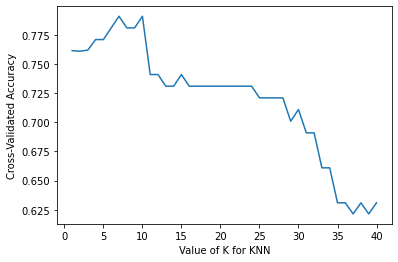

In [52]:
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()